# Digifest 2016 analysis


## Reading the dataset with pandas

http://pandas.pydata.org/

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('digifest2016dataset.csv') # dataframe object

In [3]:
df

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str
0,705802747971543040,laurajisc,More power to you' - @Jisc's opening video fro...,Fri Mar 04 17:11:02 +0000 2016,04/03/2016 17:11:02,NaN,en,NaN,NaN,702450541151068160,NaN,"<a href=""http://gaggleamp.com/twit/"" rel=""nofo...",http://pbs.twimg.com/profile_images/7046978471...,44,99.0,http://twitter.com/laurajisc/statuses/70580274...,"{""hashtags"":[{""text"":""digifest16"",""indices"":[4..."
1,705802727276847104,mark8n,More power to you' - @Jisc's opening video fro...,Fri Mar 04 17:10:58 +0000 2016,04/03/2016 17:10:58,NaN,en,NaN,NaN,39734626,NaN,"<a href=""http://gaggleamp.com/twit/"" rel=""nofo...",http://pbs.twimg.com/profile_images/209957393/...,392,142.0,http://twitter.com/mark8n/statuses/70580272727...,"{""hashtags"":[{""text"":""digifest16"",""indices"":[4..."
2,705800984661004289,JournalArchives,RT @Jisc: Timelapse action from #digifest16. S...,Fri Mar 04 17:04:02 +0000 2016,04/03/2016 17:04:02,NaN,en,NaN,NaN,383512266,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/5475238007...,402,601.0,http://twitter.com/JournalArchives/statuses/70...,"{""hashtags"":[{""text"":""digifest16"",""indices"":[3..."
3,705800366370250753,dr_mike_jones,"Presentations, podcasts &amp; resources from @...",Fri Mar 04 17:01:35 +0000 2016,04/03/2016 17:01:35,NaN,en,NaN,NaN,26623054,NaN,"<a href=""http://gaggleamp.com/twit/"" rel=""nofo...",http://pbs.twimg.com/profile_images/110555202/...,104,347.0,http://twitter.com/dr_mike_jones/statuses/7058...,"{""hashtags"":[{""text"":""digifest16"",""indices"":[5..."
4,705800366328307712,JiscLondon,"Presentations, podcasts &amp; resources from @...",Fri Mar 04 17:01:35 +0000 2016,04/03/2016 17:01:35,NaN,en,NaN,NaN,28660301,NaN,"<a href=""http://gaggleamp.com/twit/"" rel=""nofo...",http://pbs.twimg.com/profile_images/5909021514...,1064,484.0,http://twitter.com/JiscLondon/statuses/7058003...,"{""hashtags"":[{""text"":""digifest16"",""indices"":[5..."
5,705800203752882176,HistoricalTexts,RT @Jisc: Slides and resources from two very b...,Fri Mar 04 17:00:56 +0000 2016,04/03/2016 17:00:56,NaN,en,NaN,NaN,383473897,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/4799738532...,795,891.0,http://twitter.com/HistoricalTexts/statuses/70...,"{""hashtags"":[{""text"":""digifest16"",""indices"":[5..."
6,705800083930005504,wagjuer,RT @coolcatteacher: Get #Digifest16 slides and...,Fri Mar 04 17:00:27 +0000 2016,04/03/2016 17:00:27,NaN,en,NaN,NaN,31678345,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/3788000002...,2596,463.0,http://twitter.com/wagjuer/statuses/7058000839...,"{""hashtags"":[{""text"":""Digifest16"",""indices"":[2..."
7,705799329001422848,MobileTechExp,RT @ResourceProds: We have lots of digital/cre...,Fri Mar 04 16:57:27 +0000 2016,04/03/2016 16:57:27,NaN,en,NaN,NaN,4233726089,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/6676702842...,272,885.0,http://twitter.com/MobileTechExp/statuses/7057...,"{""hashtags"":[{""text"":""digifest16"",""indices"":[1..."
8,705798453847322624,g_fielding,RT @Jisc: Here it is - our list of the UK's to...,Fri Mar 04 16:53:59 +0000 2016,04/03/2016 16:53:59,NaN,en,NaN,NaN,106602916,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/1186209455...,809,1038.0,http://twitter.com/g_fielding/statuses/7057984...,"{""hashtags"":[{""text"":""jisc50social"",""indices"":..."
9,705798322263556097,hammel_rachel,RT @Jisc: Slides and resources from two very b...,Fri Mar 04 16:53:27 +0000 2016,04/03/2016 16:53:27,NaN,en,NaN,NaN,913354117,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_im

# 1. Refining the dataset

We refine the twitter dataset by using regular expressions and adding more columns to the pandas DataFrame that we can use for analysis.

In [4]:
#something here to show that there are duplicates pd.DataFrame.duplicated(df)

We want to drop any duplicate rows from our dataset

In [5]:
df = pd.DataFrame.drop_duplicates(df)

Use regular expressions and json to further refine our dataset. **re_functions.py** contains functions that use regular expressions to match with the dataset and return a more refined result. 

In [6]:
%run re_functions.py

Now let's add new columns to the dataframe by mapping the regular expression functions to get columns with more meaningful and easy to calculate data.

In [7]:
# df['is_retweet'] = df['text'].map(is_retweet)
# df['is_reply'] = df['in_reply_to_screen_name'].map(is_reply)
df['source_name'] = df['source'].map(source_name)
df['hashtags'] = df['entities_str'].map(get_hashtags)
df['user_mentions'] = df['entities_str'].map(get_mentions)
df['retweeted_user'] = df['text'].map(get_retweeted)
df['retweeted_user_list'] = df['retweeted_user'].map(to_list)
df['replied_to_user_list'] = df['in_reply_to_screen_name'].map(to_list)

/cs/home/sy35/.local/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/cs/home/sy35/.local/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cs/home/sy35/.local/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

For tweet types, we take 'Tweets' as anything that is not a reply or retweet, otherwise every single row of the dataset would count as a tweet.

In [8]:
df['tweet_type'] = df.apply(lambda row: tweet_type (row), axis = 1)

/cs/home/sy35/.local/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


# 2. Applications used to send tweets

In [9]:
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

In [10]:
df

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,...,user_friends_count,status_url,entities_str,source_name,hashtags,user_mentions,retweeted_user,retweeted_user_list,replied_to_user_list,tweet_type
0,705802747971543040,laurajisc,More power to you' - @Jisc's opening video fro...,Fri Mar 04 17:11:02 +0000 2016,04/03/2016 17:11:02,NaN,en,NaN,NaN,702450541151068160,...,99.0,http://twitter.com/laurajisc/statuses/70580274...,"{""hashtags"":[{""text"":""digifest16"",""indices"":[4...",GaggleAMP,[digifest16],[Jisc],NaN,NaN,NaN,tweet
1,705802727276847104,mark8n,More power to you' - @Jisc's opening video fro...,Fri Mar 04 17:10:58 +0000 2016,04/03/2016 17:10:58,NaN,en,NaN,NaN,39734626,...,142.0,http://twitter.com/mark8n/statuses/70580272727...,"{""hashtags"":[{""text"":""digifest16"",""indices"":[4...",GaggleAMP,[digifest16],[Jisc],NaN,NaN,NaN,tweet
2,705800984661004289,JournalArchives,RT @Jisc: Timelapse action from #digifest16. S...,Fri Mar 04 17:04:02 +0000 2016,04/03/2016 17:04:02,NaN,en,NaN,NaN,383512266,...,601.0,http://twitter.com/JournalArchives/statuses/70...,"{""hashtags"":[{""text"":""digifest16"",""indices"":[3...",Twitter Web Client,[digifest16],[Jisc],Jisc,[Jisc],NaN,retweet
3,705800366370250753,dr_mike_jones,"Presentations, podcasts &amp; resources from @...",Fri Mar 04 17:01:35 +0000 2016,04/03/2016 17:01:35,NaN,en,NaN,NaN,26623054,...,347.0,http://twitter.com/dr_mike_jones/statuses/7058...,"{""hashtags"":[{""text"":""digifest16"",""indices"":[5...",GaggleAMP,"[digifest16, edtech]",[Jisc],NaN,NaN,NaN,tweet
4,705800366328307712,JiscLondon,"Presentations, podcasts &amp; resources from @...",Fri Mar 04 17:01:35 +0000 2016,04/03/2016 17:01:35,NaN,en,NaN,NaN,28660301,...,484.0,http://twitter.com/JiscLondon/statuses/7058003...,"{""hashtags"":[{""text"":""digifest16"",""indices"":[5...",GaggleAMP,"[digifest16, edtech]",[Jisc],NaN,NaN,NaN,tweet
5,705800203752882176,HistoricalTexts,RT @Jisc: Slides and resources from two very b...,Fri Mar 04 17:00:56 +0000 2016,04/03/2016 17:00:56,NaN,en,NaN,NaN,383473897,...,891.0,http://twitter.com/HistoricalTexts/statuses/70...,"{""hashtags"":[{""text"":""digifest16"",""indices"":[5...",Twitter Web Client,"[digifest16, edtech]",[Jisc],Jisc,[Jisc],NaN,retweet
6,705800083930005504,wagjuer,RT @coolcatteacher: Get #Digifest16 slides and...,Fri Mar 04 17:00:27 +0000 2016,04/03/2016 17:00:27,NaN,en,NaN,NaN,31678345,...,463.0,http://twitter.com/wagjuer/statuses/7058000839...,"{""hashtags"":[{""text"":""Digifest16"",""indices"":[2...",Twitter for Android,[Digifest16],[coolcatteacher],coolcatteacher,[coolcatteacher],NaN,retweet
7,705799329001422848,MobileTechExp,RT @ResourceProds: We have lots of digital/cre...,Fri Mar 04 16:57:27 +0000 2016,04/03/2016 16:57:27,NaN,en,NaN,NaN,4233726089,...,885.0,http://twitter.com/MobileTechExp/statuses/7057...,"{""hashtags"":[{""text"":""digifest16"",""indices"":[1...",Twitter Web Client,[digifest16],"[ResourceProds, MobileTechExp]",ResourceProds,[ResourceProds],NaN,retweet
8,705798453847322624,g_fielding,RT @Jisc: Here it is - our list of the UK's to...,Fri Mar 04 16:53:59 +0000 2016,04/03/2016 16:53:59,NaN,en,NaN,NaN,106602916,...,1038.0,http://twitter.com/g_fielding/statuses/7057984...,"{""hashtags"":[{""text"":""jisc50social"",""indices"":...",Twitter Web Client,"[jisc50social, digifest16]",[Jisc],Jisc,[Jisc],NaN,retweet
9,705798322263556097,hammel_rachel,RT @Jisc: Slides and resources from two very b...,Fri Mar 04 16:53:27 +0000 2016,04/03/2016 16:53:27,NaN,en,NaN,NaN,913354117,...,1493.0,http://twitter.com/hammel_rachel/statuses/7057...,"{""hashtags"":[{""text"":""digifest16"",""indices"":[5...",Twitter for iPhone,"[digifest16, edtech]",[Jisc],Jisc,[Jisc],NaN,retweet


In [11]:
sources = df['source_name'].value_counts()

Now we can see all the different sources that users tweeted from thanks to our refined dataset

In [12]:
sources.size

86

Using this data, we can plot a graph to more clearly see what percentage of users are using the various different applications. But first we have to group all the sources which are very uncommon (<10% of the most common source) into an 'Other' field.

In [13]:
other_total = sources.select(lambda label: sources[label] < sources.max()/10).sum()
sources = sources.select(lambda label: sources[label] >= sources.max()/10)
sources['Other'] = other_total

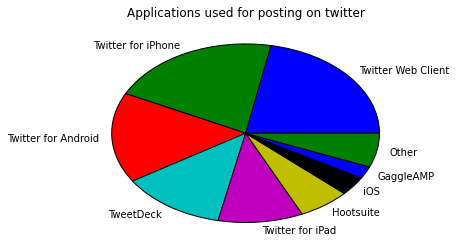

In [14]:
source_plot = sources.plot(kind="pie", title = "Applications used for posting on twitter")
source_plot.set_ylabel('')

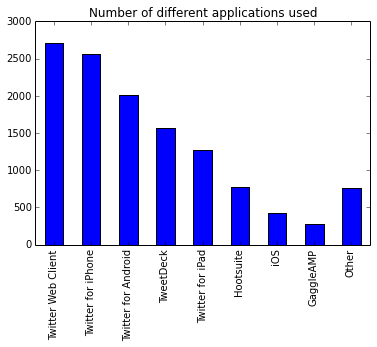

In [15]:
sources.plot(kind="bar", title="Number of different applications used", )

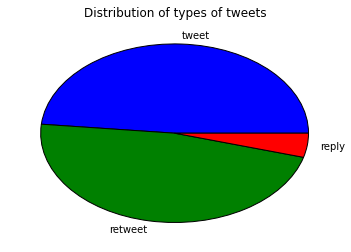

In [16]:
tweet_type_pie = df['tweet_type'].value_counts().plot(kind = 'pie', 
                                                       title = 'Distribution of types of tweets'
                                                      )
tweet_type_pie.set_ylabel('')

# 3. Means and standard deviations
Using our refined dataset, we can easily calculated the mean and standard deviations for replies, retweets and tweets.

In [17]:
typegroup = df.groupby(['tweet_type', 'from_user'])
refinedtg = typegroup.size().reset_index()
refinedtg.rename(columns = {0:'Number'}, inplace = True)

**Mean and standard deviation for replies**

In [18]:
replies = refinedtg.loc[refinedtg['tweet_type'] == 'reply']
rpmean = replies.mean(0, 'Number')['Number']
rpstd = replies.std(0, 'Number')['Number']

**Mean and standard deviation for retweets**

In [19]:
retweets = refinedtg.loc[refinedtg['tweet_type'] == 'retweet']
rtmean = retweets.mean(0, 'Number')['Number']
rtstd = retweets.std(0, 'Number')['Number']

**Mean and standard deviation for tweets**
Tweets here are 

In [20]:
tweets = refinedtg.loc[refinedtg['tweet_type'] == 'tweet']
tmean = tweets.mean(0, 'Nuumber')['Number']
tstd = tweets.std(0, 'Number')['Number']

Putting it all together into a dictionary

In [21]:
tweetdict = {'Mean per user':{'Tweets':tmean, 'Retweets':rtmean, 'Replies':rpmean},
             'Standard deviation per user':{'Tweets':tstd, 'Retweets':rtstd, 'Replies':rpstd}}

In [22]:
pd.DataFrame.from_dict(tweetdict)

,Mean per user,Standard deviation per user
Replies,2.509259,4.291680
Retweets,3.187093,8.249384
Tweets,7.542607,18.821824


In [23]:
retweeted = df['retweeted_user'].value_counts()
replied = df['in_reply_to_screen_name'].value_counts()

In [24]:
responsedict = {'Mean':{'Times retweeted'
                        :retweeted.mean(), 
                        'Times replied'
                        :replied.mean()},
                'Standard deviation':{'Times retweeted'
                                      :retweeted.std(),
                                      'Times replied'
                                      :replied.std()}}

**Here we are only including users who retweeted/replied at least once**

In [25]:
pd.DataFrame.from_dict(responsedict)

,Mean,Standard deviation
Times replied,2.326180,3.639587
Times retweeted,12.043033,54.833444


# 4. Timeline of activity

In [26]:
tweet_times = []

In [27]:
for time_tweeted in df['created_at']:
    tweet_times.append(time_tweeted)

In [28]:
ones = [1]*len(tweet_times)
idx = pd.DatetimeIndex(tweet_times)
ts = pd.Series(ones, index=idx)

In [29]:
resampled = ts.resample('30Min').sum().fillna(0)

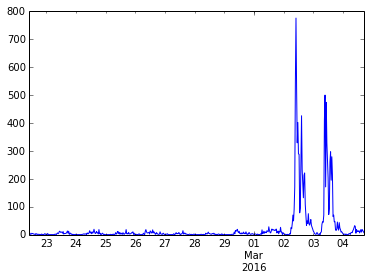

In [30]:
resampled.plot()

We use Counter to count the number of hashtags into a tuple.

In [31]:
from collections import Counter

Get the most common hashtags from the dataset

In [32]:
hts_list = [ht for ht in df.hashtags]
hts = [ht for sublist in hts_list for ht in sublist]
ht_count = Counter()

Map using str.lower to turn all hashtags to lower case

In [33]:
ht_count.update(map(str.lower, hts))

Now we can see the most common hashtags and their counts!

In [34]:
ht_count.most_common(10)

[('digifest16', 12456),
 ('edtech', 327),
 ('digitalcapability', 214),
 ('feltag', 170),
 ('jisc50social', 154),
 ('learninganalytics', 105),
 ('jiscrdm', 77),
 ('wednesdaywisdom', 58),
 ('hulldtn', 56),
 ('socialmedia', 54)]

Let's make functions to create a plot of the activity given a hashtag

In [35]:
def find_hashtag(row, hashtag, times):
    if hashtag in row['hashtags']:
        times.append(row['created_at'])

def get_hashtag_plot(hashtag, df):
    times = []
    df.apply(lambda row: find_hashtag (row, hashtag, times), axis=1)
    
    ones = [1] * len(times)
    idx = pd.DatetimeIndex(times)
    plot = pd.Series(ones, index=idx)
    return plot.resample('30Min').sum().fillna(0)

Now let's look at the 2nd, 3rd and 4th most popular hashtags together. We are intentionally ignoring the most popular hashtag (#digifest16) because almost every single tweet in the dataset uses this hashtag and it would dwarf the other hashtags on the graph.

In [36]:
h1 = "edtech"
h2 = "digitalcapability"
h3 = "feltag"

In [37]:
h1_plot = get_hashtag_plot(h1, df)
h2_plot = get_hashtag_plot(h2, df)
h3_plot = get_hashtag_plot(h3, df)

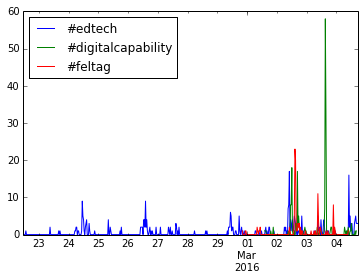

In [38]:
df2 = pd.DataFrame({'#'+h1: h1_plot, '#'+h2: h2_plot, '#'+h3: h3_plot},
                  columns=['#'+h1, '#'+h2, '#'+h3])
df2.plot()

# 5. Hashtag cloud
We use the [wordcloud](http://amueller.github.io/word_cloud/) library to create a nice visualisation of the most common hashtags. 

In [39]:
%run word_cloud.py

Using this library, we are able to generate a very colourful visualisation of the most popular hashtags used in the dataset. The library also scales the tuples well, so that even #digifest16, which we had to ignore in the section above is not overwelmingly larger than the other hashtags.

In [40]:
hashtag_wordcloud = make_wc(ht_count.most_common(100))

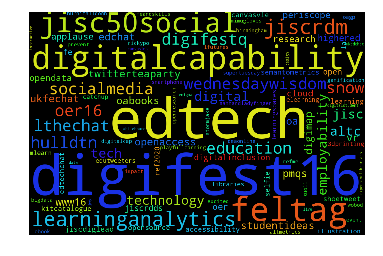

In [41]:
plt.axis("off")
plt.imshow(hashtag_wordcloud)

The library also provides a way to mask the word cloud given a coloured masked image for an even nicer visualisation. Below is the word cloud for the most popular users that were mentioned during digifest masked using the digifest logo. 

In [42]:
mentions = [m for sublist in [m for m in df.user_mentions] for m in sublist]
mentions_count = Counter()
mentions_count.update(mentions)

In [43]:
mentions_wordcloud = make_wc(mentions_count.most_common(100), "logo.png", True)

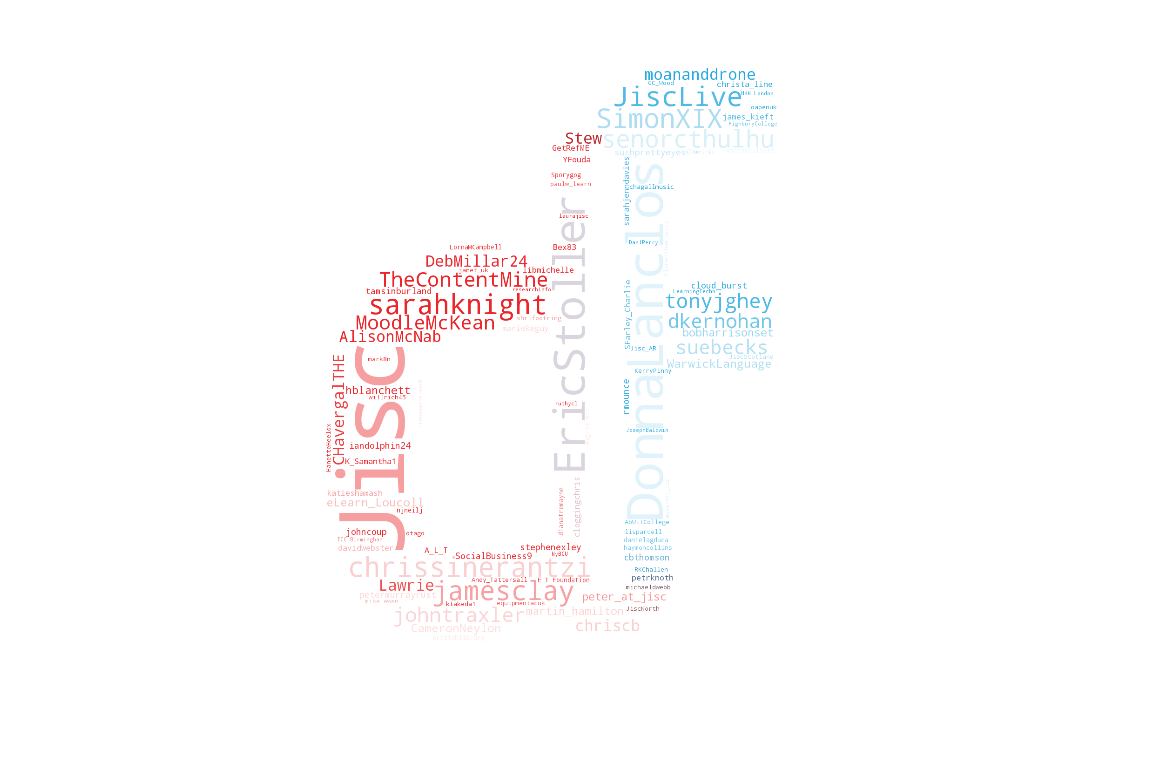

In [44]:
plt.figure(figsize=(20,20))
plt.axis("off")
plt.imshow(mentions_wordcloud)

We can see from this visualisation quite clearly that the users Jisc, EricStoller, DonnaLanclos... are the more mentioned users during digifest 2016.

# 6. Networkx and Graphviz
Using the [networkx](https://networkx.github.io/) and [graphviz](http://www.graphviz.org/) libraries, we are able to create graph networks to show the interactions between users, easily seeing which users are mentioned, replied and retweeted the most. The graphs created are quite large and take some time to load because they contain many nodes.